**Задание**

**Цель**: закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.
Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

**Этапы работы:**

Преобразуйте данные:
a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
b. закодируйте категориальные переменные числовыми значениями по необходимости.
Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.
Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.
Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.
Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
*Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.
Сформулируйте выводы по проделанной работе:
a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?
b. *может ли ROC-кривая проходить ниже диагонали?

**Результат:**

проведена оценка качества модели классификации;
реализован подсчет «вручную» основных метрик, проведено сравнение полученных результатов с готовыми функциями из библиотеки sklearn.

Преобразуйте данные:

a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

b. закодируйте категориальные переменные числовыми значениями по необходимости.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/vn322/Russian-Sport-University/main/athletes.csv', error_bad_lines=False)
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
data[ pd.isnull( data['height'] ) ]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11031,404382792,Winston Hill,FIJ,male,9/17/93,NaN,NaN,boxing,0,0,0
11208,550672127,Yemane Haileselassie,ERI,male,2/21/98,NaN,NaN,athletics,0,0,0
11220,5964702,Yesenia Miranda,ESA,female,3/26/94,NaN,NaN,athletics,0,0,0
11238,390260480,Yigal Kopinsky,SUR,male,10/16/85,NaN,NaN,judo,0,0,0


In [ ]:
data.drop('id', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         11538 non-null  object 
 1   nationality  11538 non-null  object 
 2   sex          11538 non-null  object 
 3   dob          11537 non-null  object 
 4   height       11208 non-null  float64
 5   weight       10879 non-null  float64
 6   sport        11538 non-null  object 
 7   gold         11538 non-null  int64  
 8   silver       11538 non-null  int64  
 9   bronze       11538 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 901.5+ KB


In [ ]:
(data.isna().mean() * 100).round(2)

name           0.00
nationality    0.00
sex            0.00
dob            0.01
height         2.86
weight         5.71
sport          0.00
gold           0.00
silver         0.00
bronze         0.00
dtype: float64

In [ ]:
data['height'].fillna((data['height'].mean()), inplace=True)
data['weight'].fillna((data['weight'].mean()), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         11538 non-null  object 
 1   nationality  11538 non-null  object 
 2   sex          11538 non-null  object 
 3   dob          11537 non-null  object 
 4   height       11538 non-null  float64
 5   weight       11538 non-null  float64
 6   sport        11538 non-null  object 
 7   gold         11538 non-null  int64  
 8   silver       11538 non-null  int64  
 9   bronze       11538 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 901.5+ KB


In [ ]:
data[ pd.isnull( data['dob'] ) ]


,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,Pavel Sozykin,RUS,male,NaN,1.766282,72.068205,sailing,0,0,0


  https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D0%B7%D1%8B%D0%BA%D0%B8%D0%BD,_%D0%9F%D0%B0%D0%B2%D0%B5%D0%BB_%D0%92%D0%B0%D0%BB%D0%B5%D1%80%D1%8C%D0%B5%D0%B2%D0%B8%D1%87

In [ ]:
data.at[8546, 'dob']= '12/25/87'
data.at[8546, 'dob']


'12/25/87'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         11538 non-null  object 
 1   nationality  11538 non-null  object 
 2   sex          11538 non-null  object 
 3   dob          11538 non-null  object 
 4   height       11538 non-null  float64
 5   weight       11538 non-null  float64
 6   sport        11538 non-null  object 
 7   gold         11538 non-null  int64  
 8   silver       11538 non-null  int64  
 9   bronze       11538 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 901.5+ KB


In [ ]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0
4,1.81,71.0,0,0,0
...,...,...,...,...,...
11533,1.64,58.0,0,0,0
11534,1.73,63.0,0,0,0
11535,1.85,100.0,0,0,0
11536,1.60,56.0,0,0,0


In [ ]:
le = LabelEncoder()
le.fit(data['sex'])
y = pd.Series(data = le.transform(data['sex']))
y.head(5)

0    1
1    0
2    1
3    1
4    1
dtype: int64

Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])

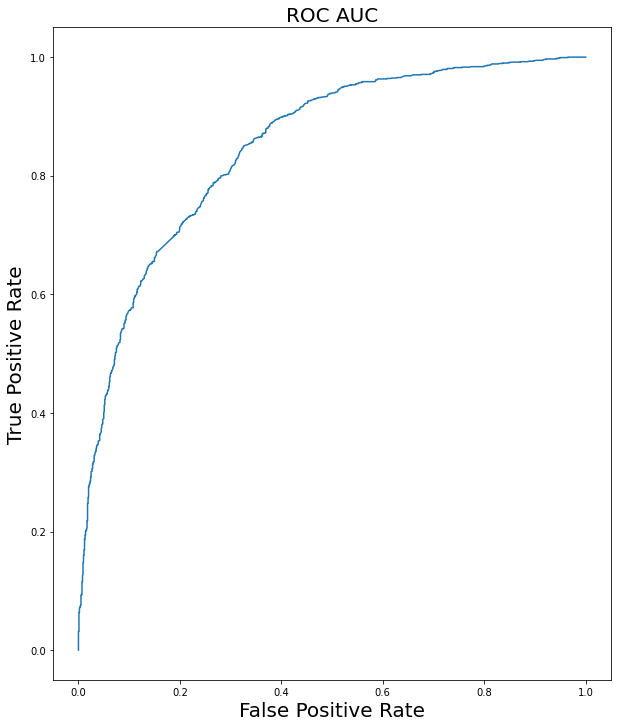

In [ ]:
plt.figure(figsize=(10, 12))
plt.plot(fpr, tpr)

plt.title('ROC AUC', fontdict={'fontsize': 20})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.show()

Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [ ]:

roc_auc_score(y_test, predictions[:, 1])

0.8470627657395775

Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [ ]:
thresholds = arange(0, 1, 0.1)

fprs = []
tprs = []
prs = []
res = []
pr_custom = []
for threshold in thresholds:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr2 = tp/(tp + fn)
    fpr2 = fp/(fp + tn)
    precision = tp/(tp + fp)
    recall = tpr2 
    fprs.append(fpr2)
    tprs.append(tpr2)
    prs.append(precision)
    res.append(recall)

Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.


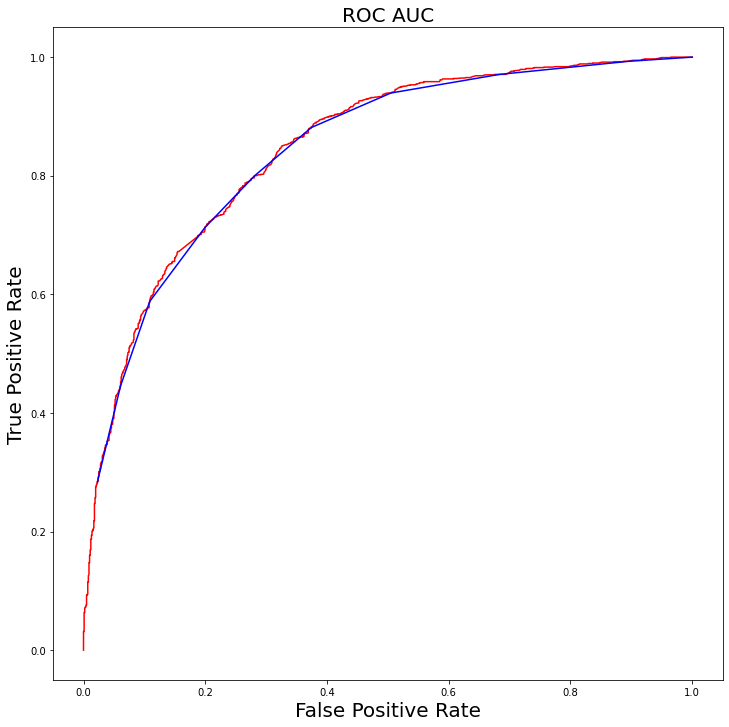

In [ ]:

plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr, color="red")
plt.plot(fprs, tprs, color="blue")
plt.title('ROC AUC', fontdict={'fontsize': 20})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.show()

Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

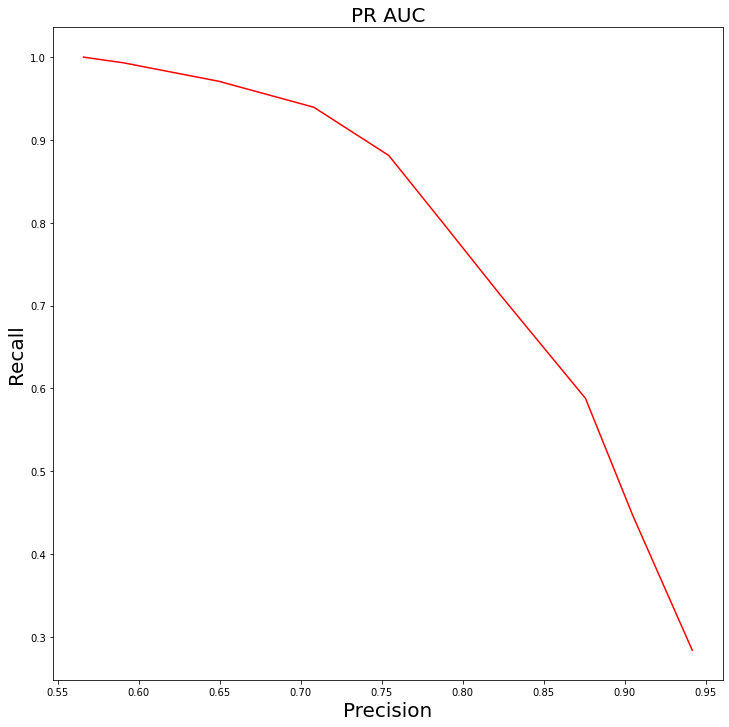

In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(prs, res, color="red")
plt.title('PR AUC', fontdict={'fontsize': 20})
plt.xlabel('Precision', fontdict={'fontsize': 20})
plt.ylabel('Recall', fontdict={'fontsize': 20})
plt.show()

Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

In [ ]:
#сортируем по возрастанию, чтобы считать от начала кривой
fprs.sort()
tprs.sort()

custom_roc_auc = 0#аналог roc_auc_score, моделируем площадь фигуры как сумму фигур по шагам
prev_fpr = 0
prev_tpr = 0
for index in range(len(fprs)):
    if(index != 0):
        custom_roc_auc += ((tprs[index] - prev_tpr) * (fprs[index] - prev_fpr) / 2) + (tprs[index] * (fprs[index] - prev_fpr))
        prev_tpr = tprs[index]
        prev_fpr = fprs[index]
print(custom_roc_auc)

0.917828202706379


Сформулируйте выводы по проделанной работе:

a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

b. *может ли ROC-кривая проходить ниже диагонали?

a.  Сравнение библиотечного и собственного подсчета графика и метрик TPR, PFR показывает, что они различаются незначительно, так как используют один и тот же принцип подсчета. Лучше пользоваться библиотечными функциями, а не творить чудеса.

b. конечно может

The most commonly seen ROC curves have a curve above the diagonal, which indicates that large predicted scores are associated with the label, and low predicted scores are not associated with the label.
The diagonal, i.e. the line TPR=FPR
A curve below the diagonal is a model that as predictions which are opposite the labels. Low predicted scores are associated with the label, and high predicted scores are not. This is the opposite of the first case.



https://translated.turbopages.org/proxy_u/en-ru.ru.915f9d05-631eed70-646c3755-74722d776562/https/stats.stackexchange.com/questions/54525/roc-curve-crossing-the-diagonal?rq=1
